In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error, roc_curve, auc, confusion_matrix, classification_report

In [4]:
pd.pandas.set_option("display.max_columns",None)

# IMPORT DATASET

In [6]:
data=pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# EXPLANATORY DATA ANALYSIS

In [7]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
data.shape

(8124, 23)

In [11]:
data1=data.apply(LabelEncoder().fit_transform)
data1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [12]:
data1.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


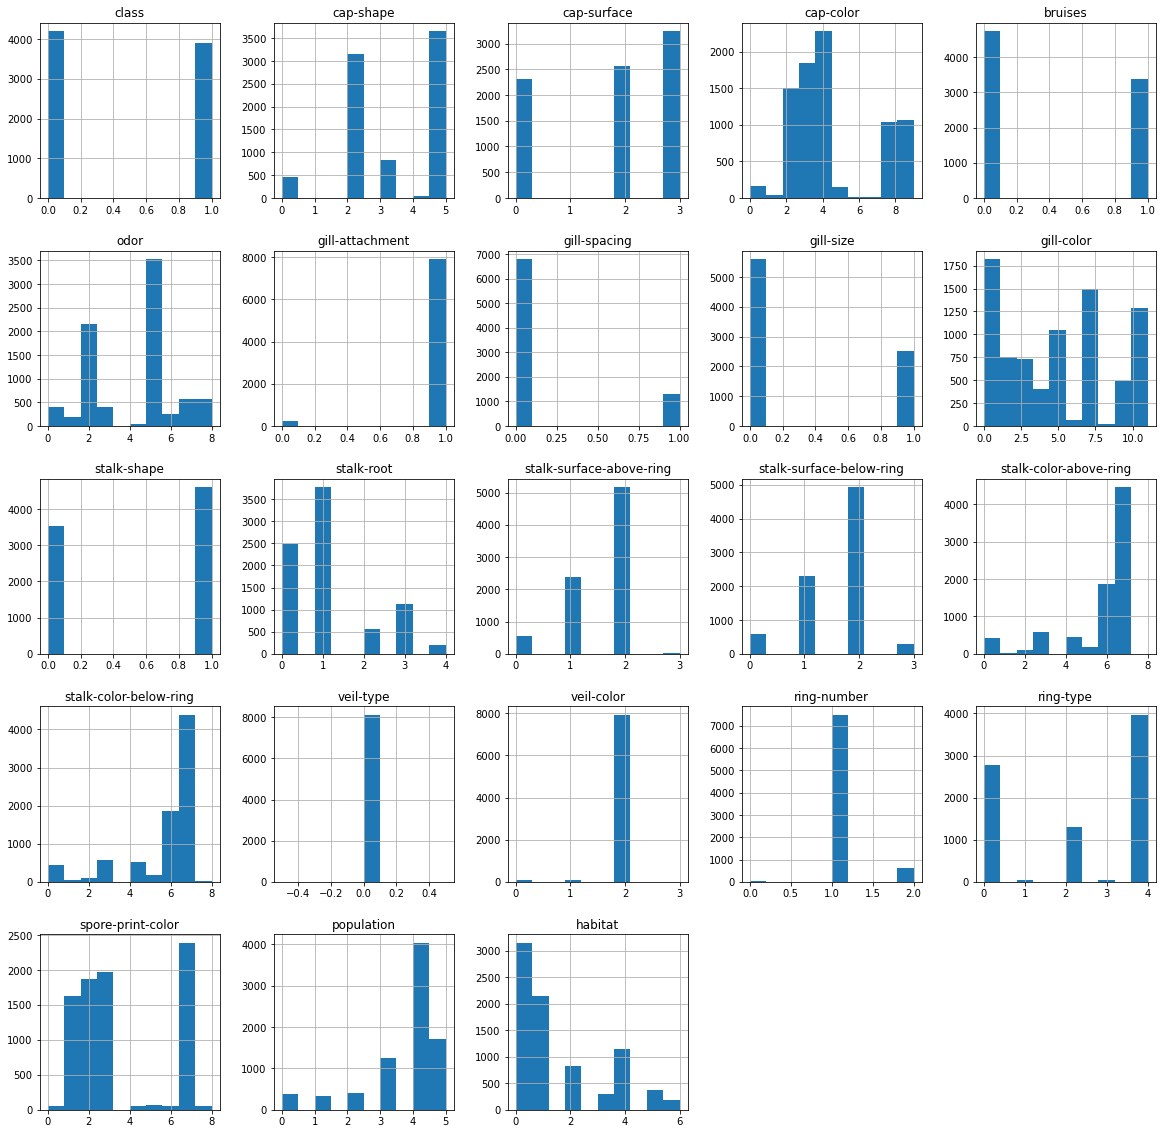

In [13]:
data1.hist(figsize=(20,20))
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [15]:
data.duplicated(keep='first').sum()

0

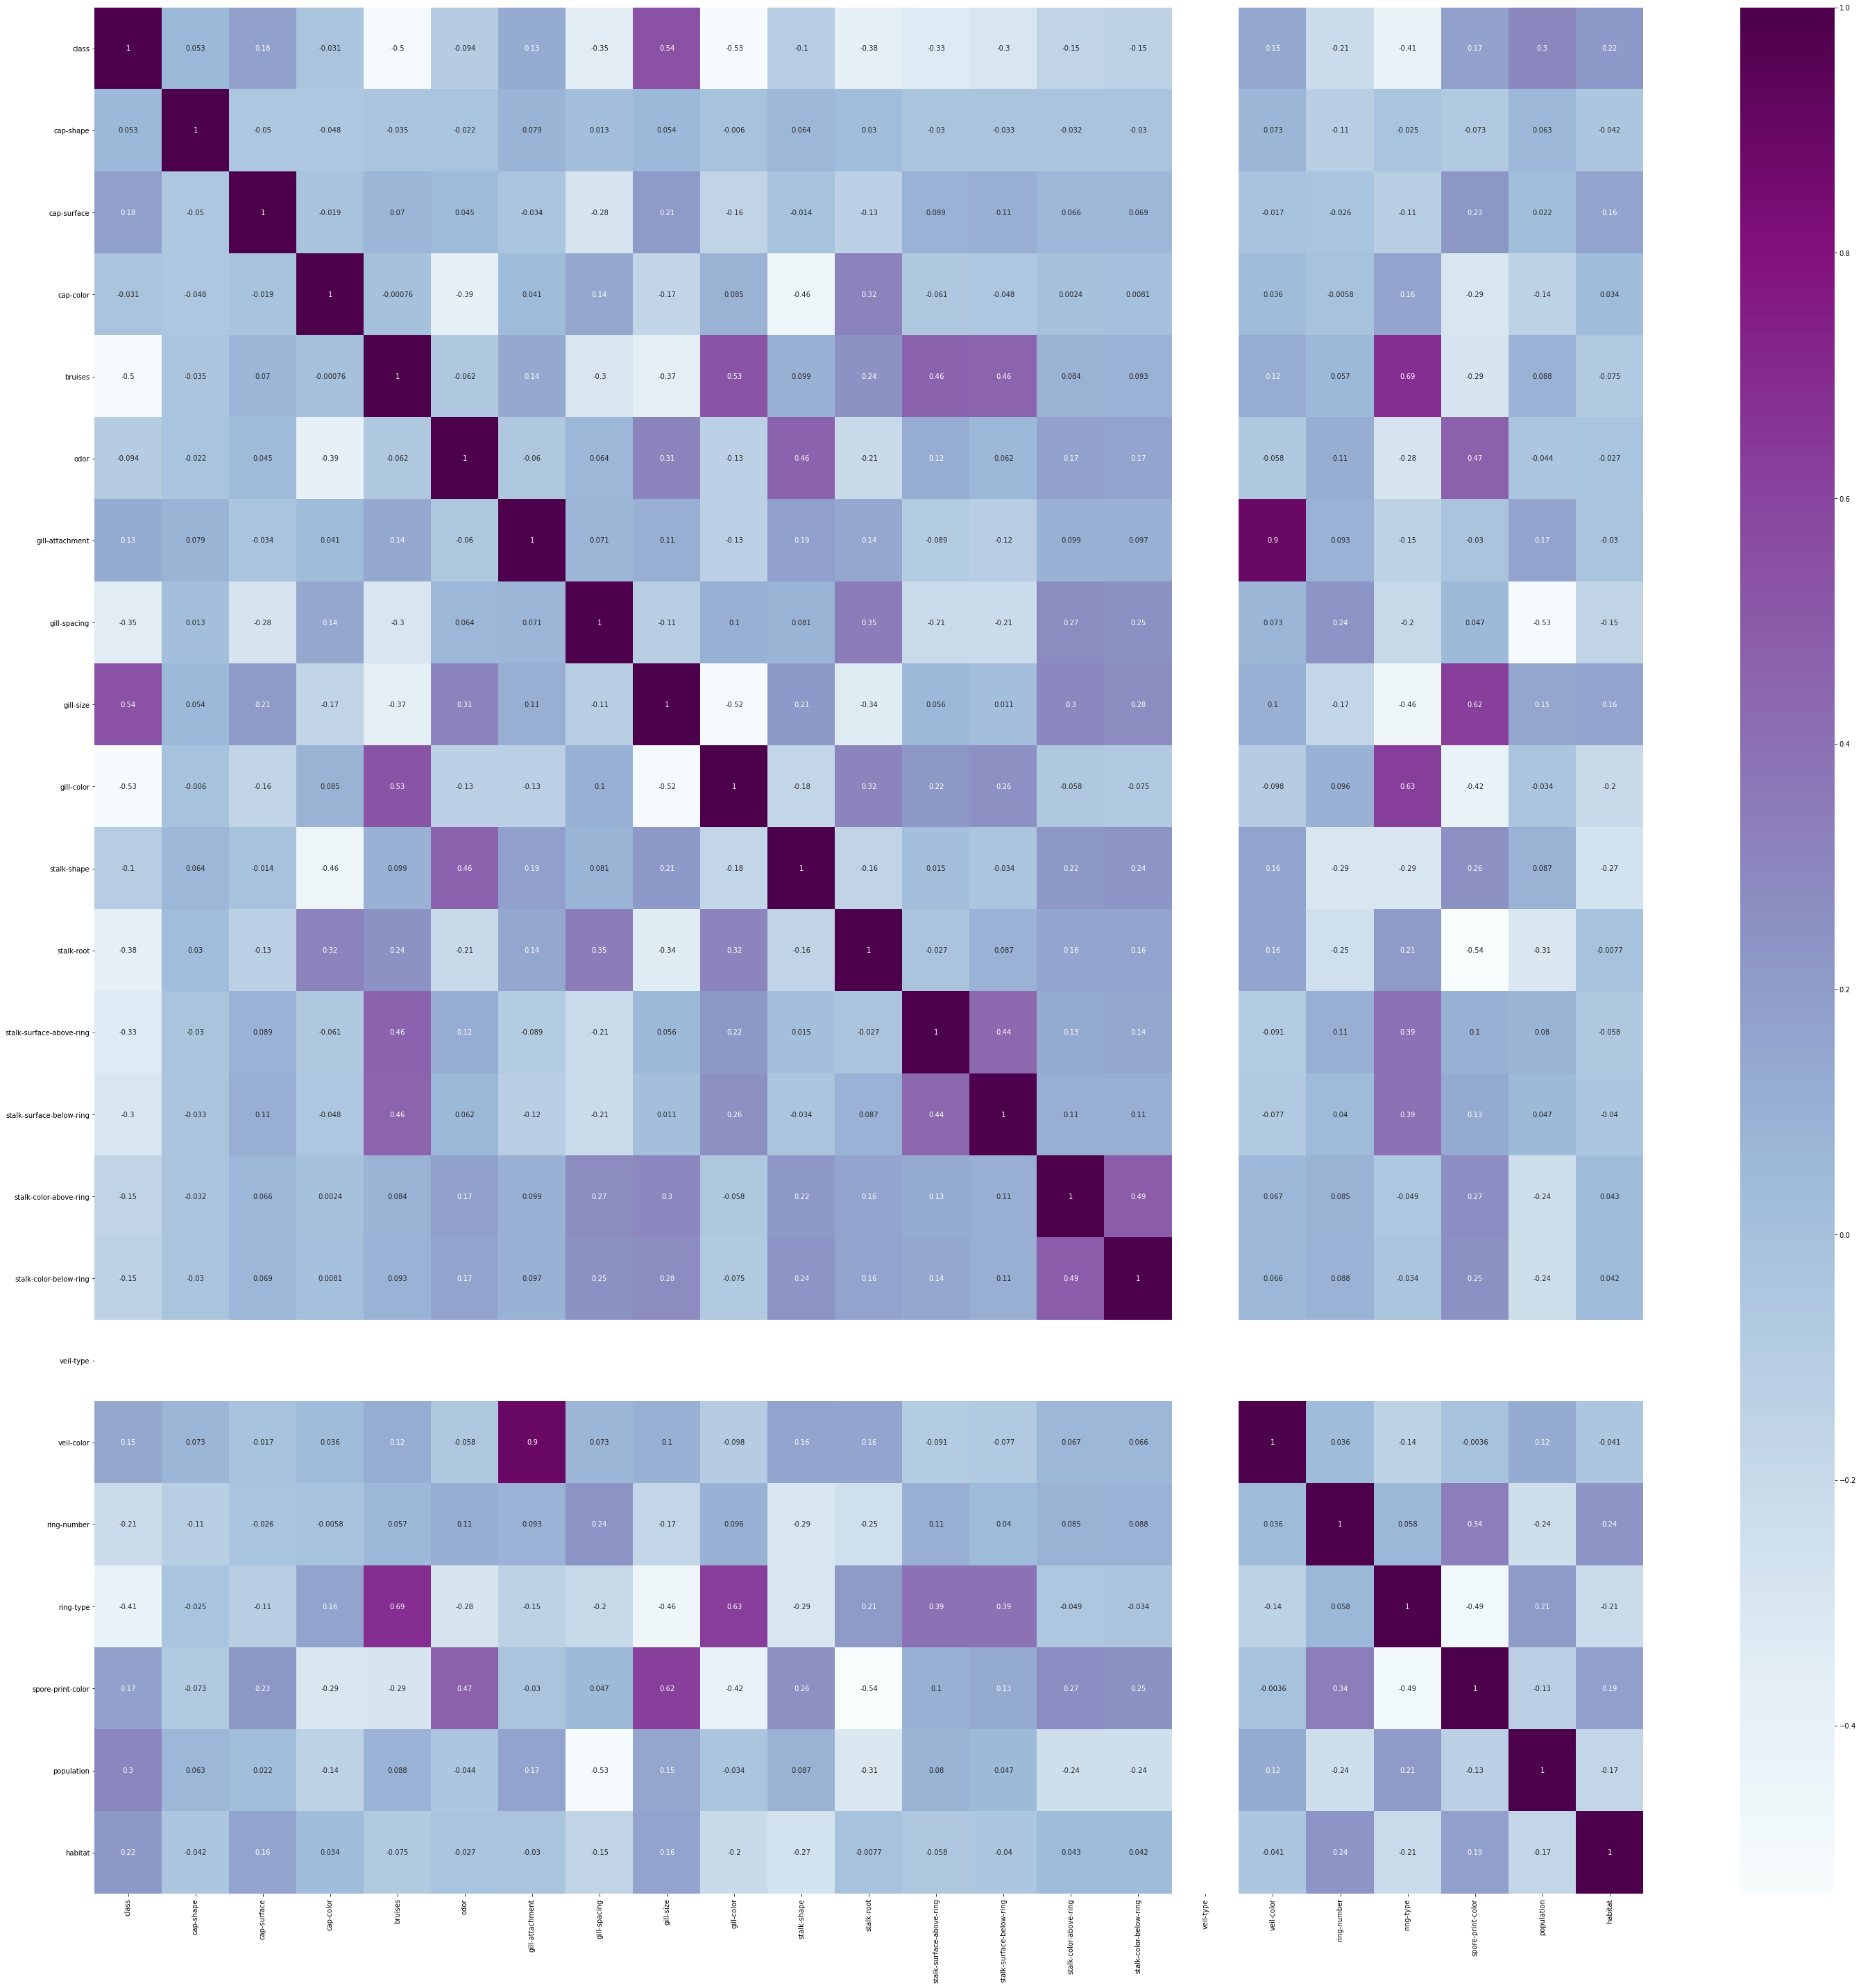

In [19]:
plt.figure(figsize=(50,50))
sns.heatmap(data1.corr(),cmap='BuPu',annot=True);

In [21]:
data2=data1.drop(['veil-type'],axis=1)

Since correlation of feature 'veil-type' is very low with other features, we can drop this feature as it will not help in the classification.

In [22]:
data2.shape

(8124, 22)

# Data Preprocessing

In [25]:
# Dividing the dataset into X (features) and y (target) variables.
X=data2.drop(data1[['class']],axis=1)
y=data2[['class']]

In [26]:
# Using train_test_split function to divide data into training and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
print ('size of X train data and y train data is {} and {} respectively.'.format(X_train.shape, y_train.shape))
print ('size of X test data and y test data is {} and {} respectively'.format(X_test.shape, y_test.shape))

size of X train data and y train data is (5443, 21) and (5443, 1) respectively.
size of X test data and y test data is (2681, 21) and (2681, 1) respectively


In [28]:
#Converting the train and test dataset into numpy array.
X_Train=np.array(X_train)
X_Test=np.array(X_test)
y_Train=np.array(y_train).reshape(-1,)
y_Test=np.array(y_test).reshape(-1,)

# NAIVE BAYES IMPLEMENTATION

In [29]:
def prior_probability(y_t,labels):
    for i in range(y_t.shape[0]):
        numerator= (y_t== labels).sum()
    denominator= y_t.shape[0]
    return numerator/denominator

In [30]:
prior_probability(y_Train,0)

0.5199338600036745

In [31]:
def prior_probability(y_Train,label):
    for i in range(y_Train.shape[0]):
        numerator= (y_Train== label).sum()
    denominator= y_Train.shape[0]
    return numerator/denominator



#Function to calculate the conditional probability.
def cond_prob(X_Train,y_Train,feature_col,feature_val,label):
    x_fil=X_Train[y_Train==label]
    num=np.sum(x_fil[:,feature_col]==feature_val)
    den=np.sum(y_Train==label)
    return num/float(den)

def prediction(X_Train,y_Train,X_Test):
    L= np.unique(y_Train)
    n=X_Train.shape[1]
    pp=[]
    for label in L:
        Likelihood=1
        for k in range(n):
            cond= cond_prob(X_Train,y_Train,k,X_Test[k],label)
            Likelihood*=cond
        prior_prob=prior_probability(y_Train,label)
        posterior_p= Likelihood*prior_prob
        pp.append(posterior_p)
    return np.argmax(pp)

#Function to calculate the accuracy of our prediction.
def score(X_Train,y_Train,X_Test,y_Test):
    pred=[]
    for i in range(X_Test.shape[0]):
        pred_list=prediction(X_Train,y_Train,X_Test[i])
        pred.append(pred_list)
    pred=np.array(pred)
    accuracy=(np.sum(pred==y_Test)/y_Test.shape[0])
    return accuracy

In [32]:
print (prediction(X_Train,y_Train,X_Test[4]))
print (y_Test[4])

1
1


In [33]:
print (score(X_Train,y_Train,X_Test,y_Test))

0.9973890339425587


# RANDOM FOREST CLASSIFIER

In [37]:
cla = RandomForestClassifier(n_estimators = 10, random_state = 42)
cla.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [41]:
predicted=cla.predict(X_test)
predicted

array([0, 1, 1, ..., 0, 0, 0])

In [45]:
print("Accuracy score using Random Forest is: {}%".format(accuracy_score(y_test, predicted)*100))

Accuracy score using Random Forest is: 100.0%


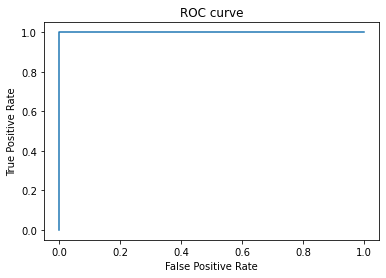

AUC value is 1.0 


In [48]:
fpr, tpr, threshold= roc_curve(y_test, predicted, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

<AxesSubplot:>

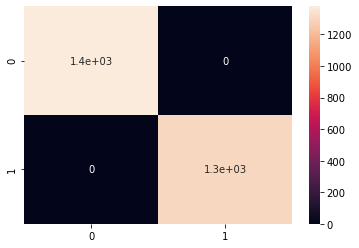

In [50]:
confu = confusion_matrix(y_test, predicted, labels = [0,1])
sns.heatmap(confu, annot=True)

In [52]:
print("Classification Report for our model is ")
print(classification_report(y_test, predicted))

Classification Report for our model is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1378
           1       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



# DESCISION TREE

In [54]:
dst = DecisionTreeClassifier()
dst.fit(X_train, y_train)


DecisionTreeClassifier()

In [56]:
predicted = dst.predict(X_test)
predicted

array([0, 1, 1, ..., 0, 0, 0])

In [58]:
print("Accuracy score using Decision Tree is: {}%".format(accuracy_score(y_test, predicted)))

Accuracy score using Decision Tree is: 1.0%


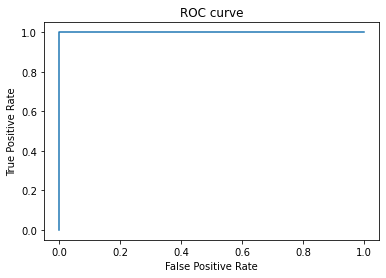

AUC value is 1.0 


In [60]:
fpr, tpr, threshold= roc_curve(y_test, predicted, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

<AxesSubplot:>

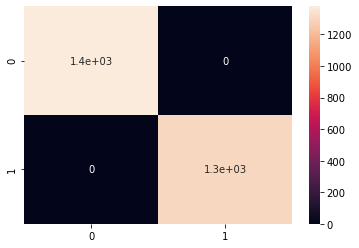

In [62]:
confu = confusion_matrix(y_test, predicted, labels = [0,1])
sns.heatmap(confu, annot=True)

In [64]:
print("Classification Report for our model is ")
print(classification_report(y_test, predicted))

Classification Report for our model is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1378
           1       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



# LOGISTIC REGRESSION

In [66]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [68]:
predicted = lr.predict(X_test)
predicted

array([0, 1, 1, ..., 0, 1, 0])

In [70]:
print("Accuracy score using Logistic Regression is: {}%".format(accuracy_score(y_test, predicted)*100))

Accuracy score using Logistic Regression is: 94.74076837001118%


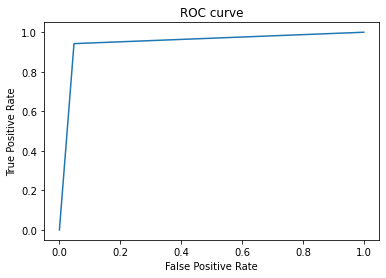

AUC value is 0.9472725105734561 


In [71]:
fpr, tpr, threshold= roc_curve(y_test, predicted, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

<AxesSubplot:>

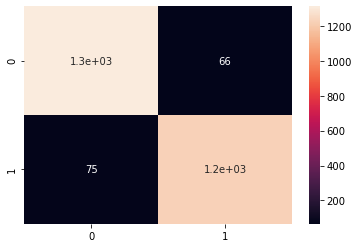

In [72]:
confu = confusion_matrix(y_test, predicted, labels = [0,1])
sns.heatmap(confu, annot=True)

In [73]:
print("Classification Report for our model is ")
print(classification_report(y_test, predicted))

Classification Report for our model is 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1378
           1       0.95      0.94      0.95      1303

    accuracy                           0.95      2681
   macro avg       0.95      0.95      0.95      2681
weighted avg       0.95      0.95      0.95      2681

